In [1]:
from read_tiles import TissueDataset
import h5py
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HDF5_FOLDER = '/media/nico/data/fourthbrain/project/output_CAMELYON16/'

In [4]:
train_data = TissueDataset(HDF5_FOLDER,  percentage=0.5, first_part=True)
# val_data = TissueDataset(path=HDF5_FILE, percentage=0.5, first_part=False)

/media/nico/data/fourthbrain/project/output_CAMELYON16/normal_013_312x312_poi0.2_level1.hdf5
/media/nico/data/fourthbrain/project/output_CAMELYON16/tumor_013_312x312_poi0.6_level1.hdf5
/media/nico/data/fourthbrain/project/output_CAMELYON16/tumor_026_312x312_poi0.6_level1.hdf5
/media/nico/data/fourthbrain/project/output_CAMELYON16/tumor_039_312x312_poi0.6_level1.hdf5
/media/nico/data/fourthbrain/project/output_CAMELYON16/normal_001_312x312_poi0.2_level1.hdf5
/media/nico/data/fourthbrain/project/output_CAMELYON16/normal_002_312x312_poi0.2_level1.hdf5
/media/nico/data/fourthbrain/project/output_CAMELYON16/normal_003_312x312_poi0.2_level1.hdf5
/media/nico/data/fourthbrain/project/output_CAMELYON16/normal_004_312x312_poi0.2_level1.hdf5
/media/nico/data/fourthbrain/project/output_CAMELYON16/normal_005_312x312_poi0.2_level1.hdf5
/media/nico/data/fourthbrain/project/output_CAMELYON16/normal_006_312x312_poi0.2_level1.hdf5
/media/nico/data/fourthbrain/project/output_CAMELYON16/normal_007_312x312

In [5]:
x, y = train_data.get_batch(num_neg=3, num_pos=3)
print(x.shape)
print(y)

(6, 256, 256, 3)
[1. 0. 0. 1. 1. 0.]


In [6]:
x

array([[[[0.93333333, 0.72156863, 0.84705882],
         [0.76078431, 0.55294118, 0.6627451 ],
         [0.54901961, 0.34117647, 0.45098039],
         ...,
         [0.97647059, 0.9372549 , 0.94117647],
         [0.92156863, 0.84705882, 0.87058824],
         [0.89019608, 0.76078431, 0.82745098]],

        [[0.7372549 , 0.52941176, 0.64705882],
         [0.51764706, 0.30980392, 0.42745098],
         [0.47058824, 0.2745098 , 0.38039216],
         ...,
         [0.91372549, 0.86666667, 0.8745098 ],
         [0.81176471, 0.73333333, 0.76862745],
         [0.89803922, 0.76862745, 0.83529412]],

        [[0.78039216, 0.58823529, 0.70196078],
         [0.58431373, 0.39215686, 0.50588235],
         [0.65882353, 0.46666667, 0.58039216],
         ...,
         [0.94901961, 0.90196078, 0.91764706],
         [0.79215686, 0.71372549, 0.75686275],
         [0.91764706, 0.79607843, 0.86666667]],

        ...,

        [[0.56862745, 0.35294118, 0.50588235],
         [0.74509804, 0.5254902 , 0.67058824]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 256, 256, 3)


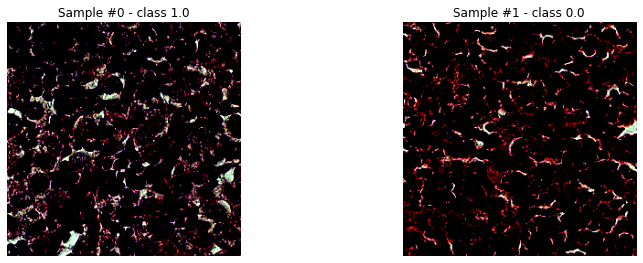

In [9]:
plt.figure(figsize=(12,4))

itera = train_data.generator(num_neg=1, num_pos=1, data_augm=True, green_layer_only=False)
for x, y in itera:
    print(x.shape)
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{} - class {}'.format(i, y[i]))
        ax.imshow(x[i])
        ax.axis('off') 
    break # generate yields infinite random samples, so we stop after first

(2, 256, 256)


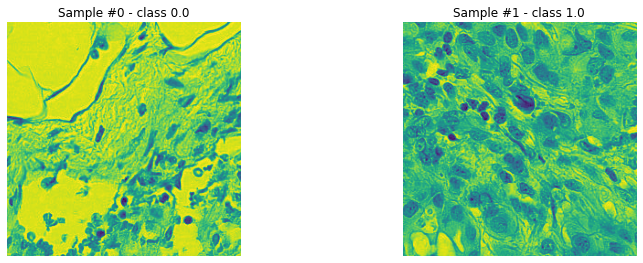

In [10]:
plt.figure(figsize=(12,4))

itera = train_data.generator(num_neg=1, num_pos=1, data_augm=True, green_layer_only=True)
for x, y in itera:
    print(x.shape)
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{} - class {}'.format(i, y[i]))
        ax.imshow(x[i])
        ax.axis('off') 
    break # generate yields infinite random samples, so we stop after first